In [1]:
#pip uninstall matplotlib

In [2]:
#Code and document origins to create a DBSCAN alogrithm cluster plot
#http://qingkaikong.blogspot.com/2016/08/clustering-with-dbscan.html
#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
#USGS https://pubs.er.usgs.gov/publication/ofr96266

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
%matplotlib inline

In [4]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

Load the Earthquake data set

In [5]:
# load the data set
df = pd.read_csv('input/earthquakes.csv', encoding='utf-8')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Set the Epsilon as 150 kilometers based upon USGS noting earthquake clusters generally occur betwe 100-200KM

In [6]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

# define epsilon as 150 kilometers to better define clusters and anomalies, converted to radians for use by haversine
epsilon = 150 / kms_per_radian

C:\Users\EasyE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Set the min sample size as 10 earthquakes to better show clusters and anomalies

In [20]:
#Set the Min Samples as 10 earthquakes in 150 km epsilon, same for clusters and anomalies
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric = "haversine").fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 21,920 points down to 116 clusters, for 99.5% compression in 4.21 seconds
Silhouette coefficient: -0.502


In [ ]:
df["cluster"] = cluster_labels

In [24]:
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,cluster
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,34
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,34
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,0
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,1
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed,0


In [10]:
import collections
collections.Counter(cluster_labels)

Counter({0: 3856,
         1: 11105,
         2: 520,
         82: 21,
         3: 298,
         4: 45,
         5: 44,
         6: 119,
         7: 1378,
         8: 17,
         9: 142,
         10: 845,
         11: 211,
         -1: 1492,
         12: 22,
         13: 81,
         14: 23,
         15: 30,
         16: 11,
         17: 85,
         18: 25,
         19: 23,
         28: 125,
         20: 99,
         43: 12,
         21: 128,
         22: 246,
         23: 28,
         24: 33,
         25: 69,
         26: 57,
         31: 24,
         29: 18,
         27: 20,
         30: 45,
         34: 44,
         32: 29,
         33: 47,
         35: 16,
         36: 29,
         90: 19,
         37: 31,
         38: 16,
         39: 27,
         40: 139,
         41: 14,
         42: 16,
         44: 16,
         95: 14,
         45: 16,
         46: 35,
         47: 19,
         48: 16,
         111: 16,
         49: 25,
         50: 16,
         51: 25,
         52: 24,
    

In [25]:
#Utilizing !=-1, or not equal to -1 to remove the anomalies which dbscan labels as -1
df = df[df.cluster != -1]

In [12]:
df.count

<bound method DataFrame.count of              Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN       

Plot the cluster points without a map

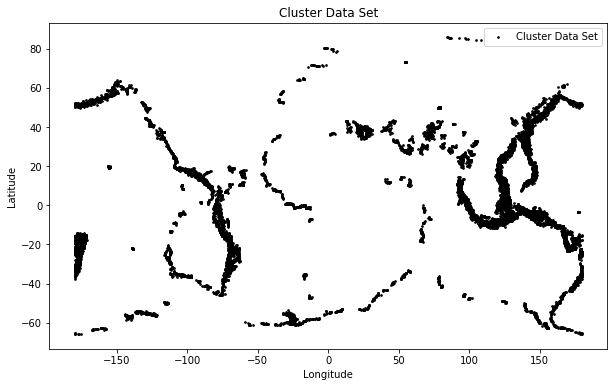

In [26]:
# plot the cluster set of coordinate points
fig, ax = plt.subplots(figsize=[10, 6])
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Cluster Data Set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter], ['Cluster Data Set'], loc='upper right')
plt.show()

Creates a new CSV file with the cluser data

In [27]:
#Creates a new .csv file with the dbscan algorithm cluster data
df.to_csv('output/earthquakes-dbscan-cluster-processed.csv', encoding='utf-8')

Sets up an enviroment to run library

In [15]:
#C:\Users\EasyE\Anaconda3\Library\share
#conda install -c conda-forge proj4
import os

os.environ['PROJ_LIB'] = r'C:\Users\EasyE\Anaconda3\Library\share'

Plots cluster data on map and save the picture as a png

C:\Users\EasyE\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


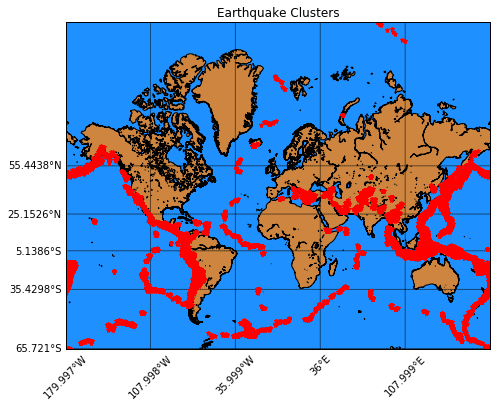

In [28]:
#Plots the dbscan cluster data with base map

#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

#appended list
lats, lons = [],[]


#44 years of earthquakes
with open('output/earthquakes-dbscan-cluster-processed.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        #names.append(data['CALL'])
        lats.append(float(data['Latitude']))
        lons.append(float(data['Longitude']))
        #altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Earthquake Clusters")
plt.savefig('output/earthquake_cluster_plots.png', format='png', dpi=500)
plt.show()

#Code Example
#https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap